In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

print(df.head())
print('--maker(제조사), fuel(연료구분(가솔린, 디젤)) 열 추출--')
dfnew = df[['maker', 'fuel']]
print('첫 5행: '); print(dfnew.head())
print('끝에서 5행: '); print(dfnew.tail())
print('변수 속성: '); print(dfnew.info())
print('데이터의 (행,열)의 크기: '); print(dfnew.shape)
print('데이터 프레임 인덱스: '); print(dfnew.index)
print('데이터 프레임의 컬럼명: '); print(dfnew.columns)
print('컬럼의 속성: '); print(dfnew.dtypes)
dfsort = dfnew.sort_values(['maker'], ascending=True)
print('컬럼의 속성: maker(제조사) 오름차순(ascending=True) 정렬 '); print(dfsort.head())
print('***제조사별 빈도수(차량의 수)*** ');print(dfnew['maker'].value_counts())
print('$$$fuel(연료)의 종류$$$'); print(dfnew['fuel'].unique())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                          title         year fuel        km  price maker
1        현대 제네시스 BH330 럭셔리 프라임팩  08/09(09년형)  가솔린  260000.0    690    현대
2  제네시스 더 올 뉴 G80 3.5 T-GDi AWD  20/06(21년형)  가솔린   10000.0    700  제네시스
3       기아 K7 프리미어 3.0 GDI 시그니처  19/07(20년형)  가솔린   20000.0   3350    기아
4       기아 더 뉴 K7 3.0 GDI 프레스티지      01월 15일  가솔린   90000.0   1990    기아
5  현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드      02월 10일   디젤  160000.0    550    현대
--maker(제조사), fuel(연료구분(가솔린, 디젤)) 열 추출--
첫 5행: 
  maker fuel
1    현대  가솔린
2  제네시스  가솔린
3    기아  가솔린
4    기아  가솔린
5    현대   디젤
끝에서 5행: 
   maker fuel
66    기아  가솔린
67  르노삼성  가솔린
68    현대   디젤
69    기아  가솔린
70    기아  LPG
변수 속성: 
<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 1 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   70 non-null     object
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

dfnew = df[['maker', 'fuel']]
crosstable = pd.crosstab(dfnew.maker, dfnew.fuel, margins=True)
print('교차 테이블, Cross Table: '); print(crosstable)
print('+++현대의 디젤 자동차 개수+++: '); print(crosstable.loc['현대', ['디젤']])

maker_freq = dfnew['maker'].value_counts()
print('###제조사별 자동차 개수###: '); print(maker_freq)

maker_prop = (dfnew['maker'].value_counts(normalize=True))*100
print('@@@제조사별 자동차 개수 비율(상대빈도)@@@: '); print(maker_prop)

result_df = pd.concat([maker_freq, maker_prop], axis=1)
result_df.columns = ['Frequency', 'Ratio(%)']
print(result_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
교차 테이블, Cross Table: 
fuel      LPG  가솔린  디젤  전기  All
maker                          
GM대우        0    1   3   0    4
기아          2   11   8   0   21
르노삼성        0    1   1   0    2
쉐보레         0    2   1   0    3
쎄미시스코       0    0   0   1    1
아리아워크스루밴    0    0   1   0    1
오딧          0    0   1   0    1
제네시스        0    9   0   0    9
케이씨         0    0   1   0    1
현대          0   18   9   0   27
All         2   42  25   1   70
+++현대의 디젤 자동차 개수+++: 
fuel
디젤    9
Name: 현대, dtype: int64
###제조사별 자동차 개수###: 
maker
현대          27
기아          21
제네시스         9
GM대우         4
쉐보레          3
르노삼성         2
오딧           1
아리아워크스루밴     1
쎄미시스코        1
케이씨          1
Name: count, dtype: int64
@@@제조사별 자동차 개수 비율(상대빈도)@@@: 
maker
현대          38.571429
기아          30.000000
제네시스        12.857143
GM대우         5.714286
쉐보레          4.285714
르노삼성         2.857143
오딧    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

frequency = Counter(df['maker'])
print(type(frequency))
N = sum(frequency.values())
print('자동차 제조사 합계:', end=''); print(N)

print('+++++제조사(maker)+++++상대도수(개수)+++++상대비율(%)+++++')
for item in frequency:
  print(item, frequency[item], round((frequency[item]/N)*100, 6))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'collections.Counter'>
자동차 제조사 합계:70
+++++제조사(maker)+++++상대도수(개수)+++++상대비율(%)+++++
현대 27 38.571429
제네시스 9 12.857143
기아 21 30.0
쉐보레 3 4.285714
오딧 1 1.428571
아리아워크스루밴 1 1.428571
GM대우 4 5.714286
쎄미시스코 1 1.428571
르노삼성 2 2.857143
케이씨 1 1.428571


--2024-06-07 10:08:38--  https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf [following]
--2024-06-07 10:08:38--  https://raw.githubusercontent.com/google/fonts/main/ofl/nanumgothic/NanumGothic-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2054744 (2.0M) [application/octet-stream]
Saving to: ‘NanumGothic-Regular.ttf’

NanumGothic-Regular 100%[===================>]   1.96M  --.-KB/s    in 0.07s   

2024-06-07 10:08:38 (28.6 MB/s) - ‘NanumGothic-Regul

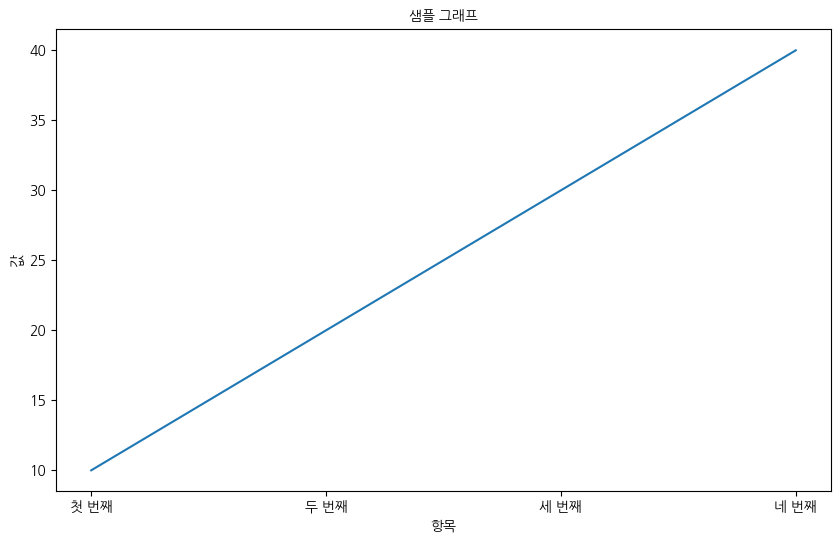

In [ ]:
# import matplotlib.font_manager as fm
# import matplotlib.pyplot as plt
# import shutil

# # NanumGothic 폰트를 Google Fonts에서 다운로드하여 설치합니다.
# !wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf
# !wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Bold.ttf
# !wget https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-ExtraBold.ttf

# # 다운로드한 폰트를 적절한 폴더로 이동합니다.
# shutil.move('NanumGothic-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf')
# shutil.move('NanumGothic-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic-Bold.ttf')
# shutil.move('NanumGothic-ExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic-ExtraBold.ttf')

# # 폰트 캐시를 갱신합니다.
# !fc-cache -fv
# !rm -rf ~/.cache/matplotlib

# # matplotlib의 폰트 관리자에 새 폰트를 등록합니다.
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic-Regular.ttf'
# font_prop = fm.FontProperties(fname=font_path)
# fm.fontManager.addfont(font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# # 간단한 데이터로 그래프를 그립니다.
# data = [10, 20, 30, 40]
# labels = ['첫 번째', '두 번째', '세 번째', '네 번째']

# plt.figure(figsize=(10, 6))
# plt.plot(data)
# plt.xticks(ticks=range(len(labels)), labels=labels, fontproperties=font_prop)
# plt.title('샘플 그래프', fontproperties=font_prop)
# plt.xlabel('항목', fontproperties=font_prop)
# plt.ylabel('값', fontproperties=font_prop)
# plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 18 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

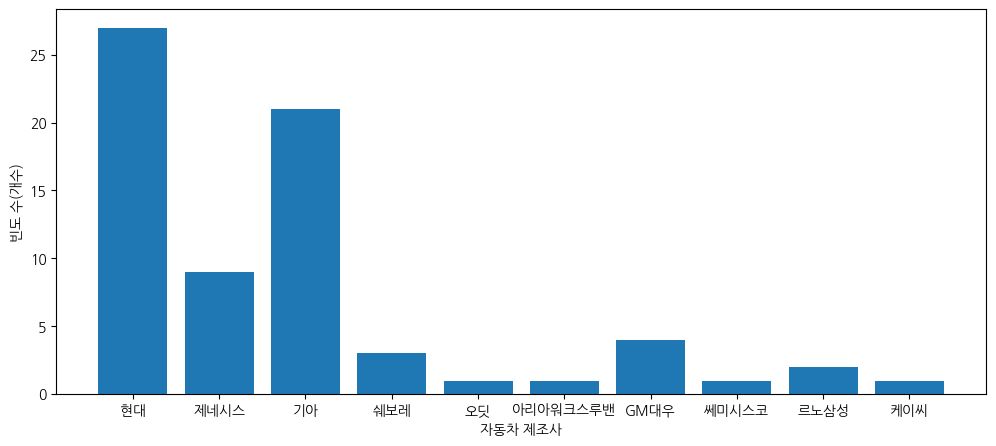

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

frequency = Counter(df.maker)

plt.figure(figsize=(12,5))
plt.xlabel('자동차 제조사')
plt.ylabel('빈도 수(개수)')
plt.bar(frequency.keys(), frequency.values())
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 18 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

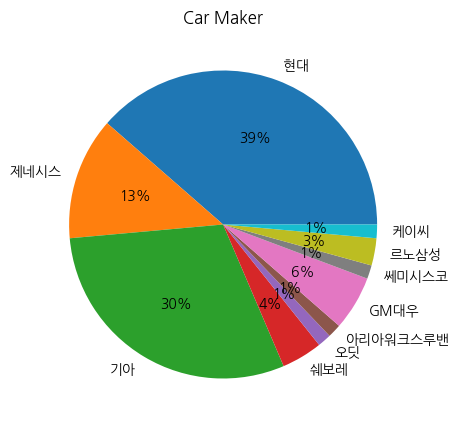

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

frequency = Counter(df.maker)

plt.figure(figsize=(5,5))
plt.title('Car Maker')
plt.pie(frequency.values(), labels=frequency.keys(), autopct='%.lf%%')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

dfnew = df[['km', 'price']]
print(dfnew.head())

print('*****price에 대한 주요 기술통계량*****')
print('자동차 가격에 대한 데이터 행의 개수: ', end=''); print(dfnew['price'].shape[0])
print('자동차 가격의 평균(만원): ', end=''); print(dfnew['price'].mean())
print('자동차 가격의 최소값(만원): ', end=''); print(dfnew['price'].min())
print('자동차 가격의 최대값(만원): ', end=''); print(dfnew['price'].max())
print('자동차 가격의 범위(최대값-최소값)(만원): ', end=''); print(dfnew['price'].max()-dfnew['price'].min())
print('자동차 가격의 중앙값(만원): ', end=''); print(dfnew['price'].median())
print('자동차 가격의 분산: ', end=''); print(dfnew['price'].var())
print('자동차 가격의 표준편차(만원): ', end=''); print(dfnew['price'].std())
CV = dfnew['price'].std()/dfnew['price'].mean()
print('자동차 가격의 변동계수: ', end=''); print(CV)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         km  price
1  260000.0    690
2   10000.0    700
3   20000.0   3350
4   90000.0   1990
5  160000.0    550
*****price에 대한 주요 기술통계량*****
자동차 가격에 대한 데이터 행의 개수: 70
자동차 가격의 평균(만원): 2422.157142857143
자동차 가격의 최소값(만원): 160
자동차 가격의 최대값(만원): 8500
자동차 가격의 범위(최대값-최소값)(만원): 8340
자동차 가격의 중앙값(만원): 1635.0
자동차 가격의 분산: 4242235.264803312
자동차 가격의 표준편차(만원): 2059.6687269566705
자동차 가격의 변동계수: 0.8503447982434014


In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

print('####quantile() 함수 이용_pandas###')
print('자동차 가격의 제1사분위수(하위 25%): ', end=''); print(df.price.quantile(0.25))
print('자동차 가격의 제2사분위수(하위 50%, 중앙값): ', end=''); print(df.price.quantile(0.5))
print('자동차 가격의 제3사분위수(하위 75%): ', end=''); print(df.price.quantile(0.75))
print('자동차 가격의 하위 5%: ', end=''); print(df.price.quantile(0.05))
print('자동차 가격의 하위 95%: ', end=''); print(df.price.quantile(0.95))

print('####percentile() 함수 이용_numpy###')
print('자동차 가격의 제1사분위수(하위 25%): ', end=''); print(np.percentile(df.price, 25))
print('자동차 가격의 제2사분위수(하위 50%, 중앙값): ', end=''); print(np.percentile(df.price, 50))
print('자동차 가격의 제3사분위수(하위 75%): ', end=''); print(np.percentile(df.price, 75))
print('자동차 가격의 하위 5%: ', end=''); print(np.percentile(df.price, 5))
print('자동차 가격의 하위 95%: ', end=''); print(np.percentile(df.price, 95))

print('$$$$describe() method 이용$$$$')
print(df.price.describe())
print('자동차 가격의 제1사분위수(하위 25%): ', end=''); print(df.price.describe()['25%'])
print('자동차 가격의 제2사분위수(하위 50%, 중앙값): ', end=''); print(df.price.describe()['50%'])
print('자동차 가격의 제3사분위수(하위 75%): ', end=''); print(df.price.describe()['75%'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
####quantile() 함수 이용_pandas###
자동차 가격의 제1사분위수(하위 25%): 750.0
자동차 가격의 제2사분위수(하위 50%, 중앙값): 1635.0
자동차 가격의 제3사분위수(하위 75%): 3847.5
자동차 가격의 하위 5%: 396.05
자동차 가격의 하위 95%: 5959.5
####percentile() 함수 이용_numpy###
자동차 가격의 제1사분위수(하위 25%): 750.0
자동차 가격의 제2사분위수(하위 50%, 중앙값): 1635.0
자동차 가격의 제3사분위수(하위 75%): 3847.5
자동차 가격의 하위 5%: 396.05
자동차 가격의 하위 95%: 5959.5
$$$$describe() method 이용$$$$
count      70.000000
mean     2422.157143
std      2059.668727
min       160.000000
25%       750.000000
50%      1635.000000
75%      3847.500000
max      8500.000000
Name: price, dtype: float64
자동차 가격의 제1사분위수(하위 25%): 750.0
자동차 가격의 제2사분위수(하위 50%, 중앙값): 1635.0
자동차 가격의 제3사분위수(하위 75%): 3847.5


In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

cnt = Counter(df.price)
print('+++자동차 가격별 빈도수')
print(cnt)

cnt1 = cnt.most_common()
print('+++자동차 가격별 빈도수(내림차순 정렬)')
print(cnt1)

cnt2 = cnt.most_common(7)
print('+++자동차 가격별 빈도수(내림차순 정렬, 7개)', end=''); print(cnt2)

mode = cnt.most_common(1)
print('+++자동차 가격 (최빈값, 빈도수): ', end=''); print(mode)
print('+++자동차 가격 최빈값: ', end=''); print(mode[0][0])
print('+++자동차 가격 최빈값의 빈도수: ', end=''); print(mode[0][1])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+++자동차 가격별 빈도수
Counter({750: 3, 650: 3, 690: 2, 1990: 2, 5500: 2, 5000: 2, 1050: 2, 700: 1, 3350: 1, 550: 1, 3080: 1, 1960: 1, 990: 1, 1650: 1, 1790: 1, 8500: 1, 3100: 1, 6000: 1, 1200: 1, 295: 1, 600: 1, 4600: 1, 1620: 1, 4750: 1, 1350: 1, 2650: 1, 1590: 1, 5910: 1, 5600: 1, 1199: 1, 4150: 1, 2150: 1, 1740: 1, 570: 1, 300: 1, 5215: 1, 7050: 1, 4500: 1, 3400: 1, 7800: 1, 1500: 1, 2500: 1, 3980: 1, 2499: 1, 3450: 1, 1420: 1, 890: 1, 520: 1, 950: 1, 830: 1, 1495: 1, 160: 1, 489: 1, 3999: 1, 2100: 1, 1690: 1, 1150: 1, 590: 1, 5580: 1, 320: 1, 870: 1})
+++자동차 가격별 빈도수(내림차순 정렬)
[(750, 3), (650, 3), (690, 2), (1990, 2), (5500, 2), (5000, 2), (1050, 2), (700, 1), (3350, 1), (550, 1), (3080, 1), (1960, 1), (990, 1), (1650, 1), (1790, 1), (8500, 1), (3100, 1), (6000, 1), (1200, 1), (295, 1), (600, 1), (4600, 1), (1620, 1), (4750, 1), (1350, 1), (2650, 1), (1590, 1), (5

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

print('+++자동차 가격(price)의 기술통계량 요약+++')
print(df.price.describe())
print('%%%자동차 주행거리(km)의 기술통계량 요약%%%')
print(df.km.describe())

print('^^^^데이터프레임의 행과 열 변환')
print(df.T.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+++자동차 가격(price)의 기술통계량 요약+++
count      70.000000
mean     2422.157143
std      2059.668727
min       160.000000
25%       750.000000
50%      1635.000000
75%      3847.500000
max      8500.000000
Name: price, dtype: float64
%%%자동차 주행거리(km)의 기술통계량 요약%%%
count        70.000000
mean      86267.714286
std       69112.602378
min          13.000000
25%       30000.000000
50%       80000.000000
75%      127500.000000
max      290000.000000
Name: km, dtype: float64
^^^^데이터프레임의 행과 열 변환
                           1                             2   \
title  현대 제네시스 BH330 럭셔리 프라임팩  제네시스 더 올 뉴 G80 3.5 T-GDi AWD   
year              08/09(09년형)                   20/06(21년형)   
fuel                      가솔린                           가솔린   
km                   260000.0                       10000.0   
price                     690                           700   

        

In [8]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy.stats import skew, kurtosis

df = pd.read_csv('/content/drive/MyDrive/work/usedcars.csv', encoding='euc-kr', index_col=0)

print('+++scipy.stats 모듈 이용 skewness(왜도), kurtosis(첨도)')
print('자동차 가격의 왜도: ', end=''); print(skew(df.price))
print('자동차 주행거리의 왜도: ', end=''); print(skew(df.km))

print('자동차 가격의 첨도: ', end=''); print(kurtosis(df.price, fisher=True))
print('자동차 주행거리의 첨도: ', end=''); print(kurtosis(df.km, fisher=True))

print('+++pandas 모듈 이용 skewness(왜도), kurtosis(첨도)')
print('자동차 가격의 왜도: ', end=''); print(df.price.skew())
print('자동차 주행거리의 왜도: ', end=''); print(df.km.skew())

print('자동차 가격의 첨도: ', end=''); print(df.price.kurt())
print('자동차 주행거리의 첨도: ', end=''); print(df.km.kurt())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+++scipy.stats 모듈 이용 skewness(왜도), kurtosis(첨도)
자동차 가격의 왜도: 1.0575344344602926
자동차 주행거리의 왜도: 0.8357837246716393
자동차 가격의 첨도: 0.17203781745385083
자동차 주행거리의 첨도: 0.4606352248440335
+++pandas 모듈 이용 skewness(왜도), kurtosis(첨도)
자동차 가격의 왜도: 1.080834428382778
자동차 주행거리의 왜도: 0.8541980240748542
자동차 가격의 첨도: 0.2758589261866584
자동차 주행거리의 첨도: 0.5861834869426965


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용회수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   
190108  남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   
190109  남자  40-44세  공무원  중도시  169.2      4  63.6  54.0  51.6       5   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190105   7   7    1   4      4  4300  
190106   7   4    7   7      7  7500  
190107   4   4    3   3      6  2900  
190108   3   3    4   6      5  5300  
190109   6   4    7   4      6  4000  


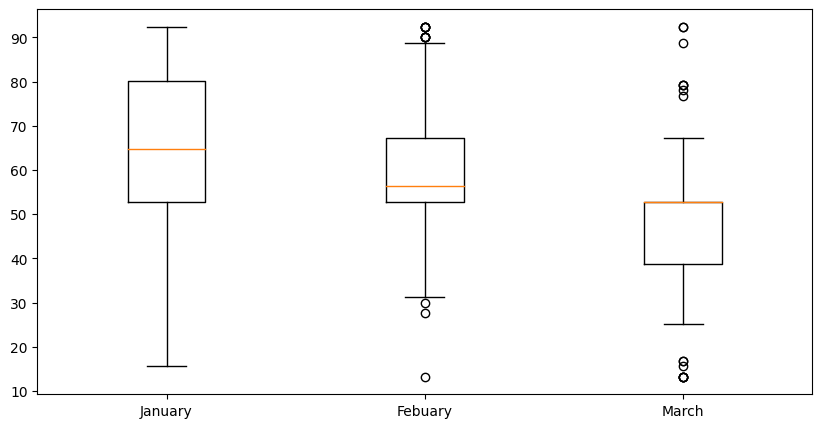

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)

print(df.head())
x = df.쇼핑1월
y = df.쇼핑2월
z = df.쇼핑3월

plt.figure(figsize=(10, 5))
plt.boxplot([x,y,z])
idx = np.arange(1, 4)
labels = ['January', 'Febuary', 'March']
plt.xticks(idx, labels)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-14-88cae7b7a70a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew.rename(columns={'쇼핑1월':'January', '쇼핑2월':'February'}, inplace=True)


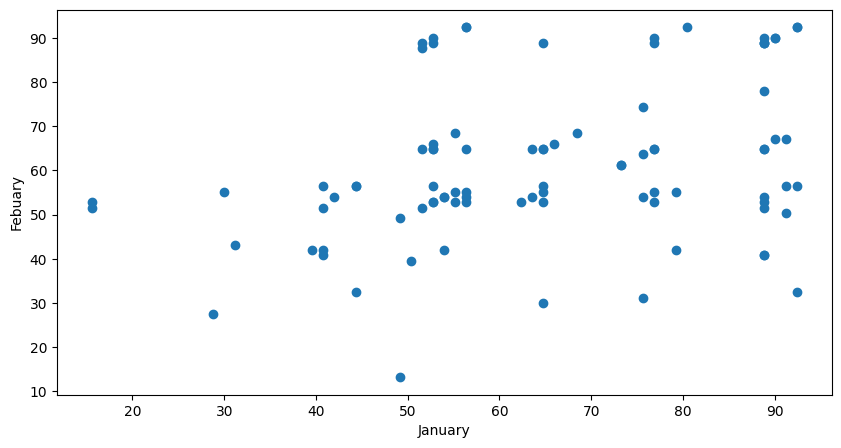

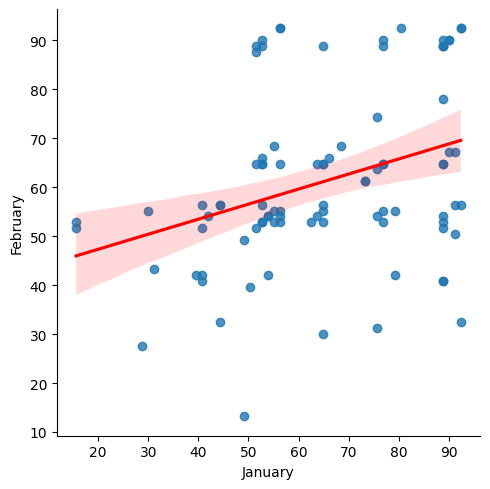

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

dfnew = df[['쇼핑1월','쇼핑2월']]
dfnew.rename(columns={'쇼핑1월':'January', '쇼핑2월':'February'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.xlabel('January')
plt.ylabel('Febuary')
plt.scatter(x,y)
sns.lmplot(x='January', y='February', data=dfnew, line_kws={'color':"red"})
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-17-240c9c3f935b>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x.index, x, use_line_collection=True)


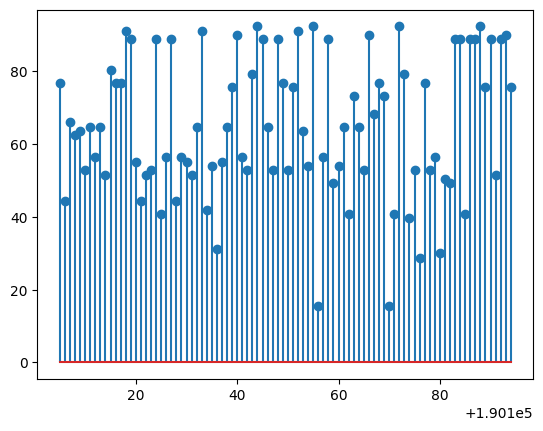

<ipython-input-17-240c9c3f935b>:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y.index, y, orientation='horizontal', use_line_collection=True)


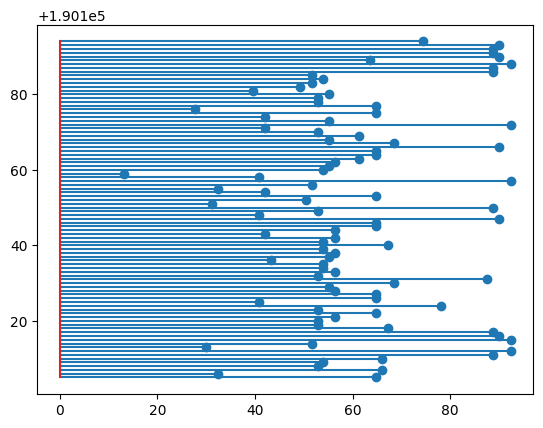

In [17]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

plt.stem(x.index, x, use_line_collection=True)
plt.show()

plt.stem(y.index, y, orientation='horizontal', use_line_collection=True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


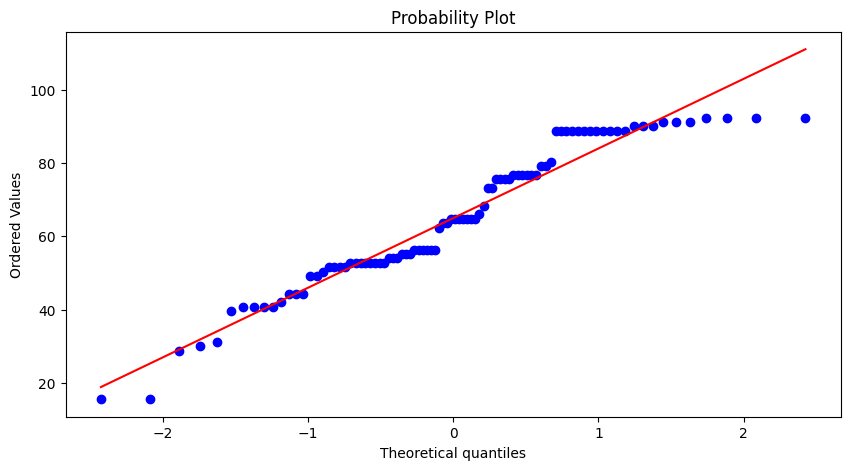

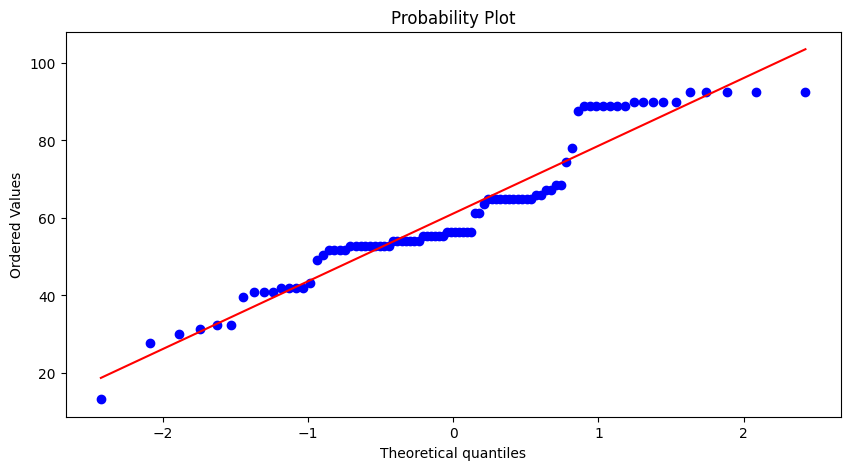

In [18]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('/content/drive/MyDrive/work/data.csv', encoding='euc-kr', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

plt.figure(figsize=(10, 5))
stats.probplot(x, dist=stats.norm, plot=plt)
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(y, dist=stats.norm, plot=plt)
plt.show()

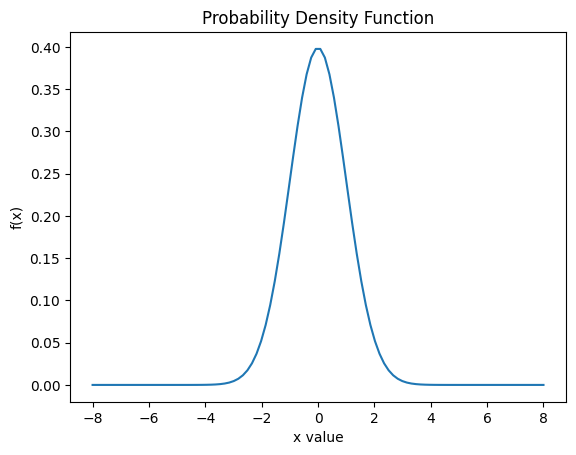

In [19]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import numpy as np
x = np.linspace(-8, 8, 100)
rv = sp.stats.norm()
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.title('Probability Density Function')
plt.xlabel('x value')
plt.ylabel('f(x)')
plt.show()